In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def data_preprocessing(data):
    #Prepare the dataset
    data = data.drop(columns=["Open Time", "Coin"])  # Drop non-numeric columns
    data = data.dropna()  # Remove the last row since it has no target

    # Define features and target
    X = data.drop(columns=["Close"])
    y = data["Close"]
    return X, y

In [35]:
def train_model(X_train, y_train):
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

In [36]:
def evaluate_model(X_test, y_test, model, currency):
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)

    print(f'MAE of {currency}:' + str(mae))
    print(f"RMSE of {currency}:" + str(rmse))
    return y_pred

In [37]:
def plot_comparison(y_test, y_pred, currency):
    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values[:100], label="Actual", linestyle="-", marker="o", alpha=0.7)  # First 100 points
    plt.plot(y_pred[:100], label="Predicted", linestyle="-", marker="x", alpha=0.7)

    plt.xlabel("Time (minutes)")
    plt.ylabel("Closing Price (USD)")
    plt.title(f"Actual vs. Predicted Closing Prices (First 100 Minutes of Training Dataset) - {currency}")
    plt.legend()
    plt.grid(True)
    plt.show()

In [38]:
def next_minute_price(X,y, model,currency):
    # Predict the next minute's closing price
    next_minute_price = model.predict(X.iloc[-1].values.reshape(1, -1))[0]
    if next_minute_price > y.iloc[-1]:
        print(f"{currency}: The price will increase from ${y.iloc[-1]} to ${next_minute_price}")
    elif next_minute_price < y.iloc[-1]:
        print(f"{currency}: The price will decrease from ${y.iloc[-1]} to ${next_minute_price}")

#### 1. Training Using Price + Indicators

In [39]:

# Load the datasets
btc_indicators = pd.read_csv("processed_data/BTC_1m_data_indicators.csv")
eth_indicators = pd.read_csv("processed_data/ETH_1m_data_indicators.csv")
xrp_indicators = pd.read_csv("processed_data/XRP_1m_data_indicators.csv")
solana_indicators = pd.read_csv("processed_data/SOL_1m_data_indicators.csv")



In [40]:
X_btc, y_btc = data_preprocessing(btc_indicators)
X_eth, y_eth = data_preprocessing(eth_indicators)
X_xrp, y_xrp = data_preprocessing(xrp_indicators)
X_sol, y_sol = data_preprocessing(solana_indicators)

In [41]:
X_train_btc, X_test_btc, y_train_btc, y_test_btc = train_test_split(X_btc, y_btc, test_size=0.2, random_state=42, shuffle=False)
X_train_eth, X_test_eth, y_train_eth, y_test_eth = train_test_split(X_eth, y_eth, test_size=0.2, random_state=42, shuffle=False)
X_train_xrp, X_test_xrp, y_train_xrp, y_test_xrp = train_test_split(X_xrp, y_xrp, test_size=0.2, random_state=42, shuffle=False)
X_train_sol, X_test_sol, y_train_sol, y_test_sol = train_test_split(X_sol, y_sol, test_size=0.2, random_state=42, shuffle=False)

In [42]:
btc_model= train_model(X_train_btc, y_train_btc)
eth_model = train_model(X_train_eth, y_train_eth)
xrp_model = train_model(X_train_xrp, y_train_xrp)
solana_model = train_model(X_train_sol, y_train_sol)

In [43]:
y_pred_btc = evaluate_model(X_test_btc, y_test_btc, btc_model, 'BTC')
y_pred_eth = evaluate_model(X_test_eth, y_test_eth, eth_model, 'ETH')
y_pred_xrp = evaluate_model(X_test_xrp, y_test_xrp, xrp_model, 'XRP')
y_pred_sol = evaluate_model(X_test_sol, y_test_sol, solana_model, 'SOL')

MAE of BTC:17.597843233965932
RMSE of BTC:862.8422426560974
MAE of ETH:0.8649891279467349
RMSE of ETH:1.7058036989881313
MAE of XRP:0.0010696768350481898
RMSE of XRP:2.461993968184597e-06
MAE of SOL:0.0708003722973915
RMSE of SOL:0.010264473472667061


In [44]:
next_minute_price(X_btc, y_btc, btc_model, 'BTC')
next_minute_price(X_eth, y_eth, eth_model, 'ETH')
next_minute_price(X_xrp, y_xrp, xrp_model, 'XRP')
next_minute_price(X_sol, y_sol, solana_model, 'SOL')

BTC: The price will increase from $83940.96 to $83955.4238680705
ETH: The price will decrease from $2222.31 to $2221.23824688006
XRP: The price will decrease from $2.145 to $2.144729268509806
SOL: The price will increase from $145.44 to $145.51241549428627


/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


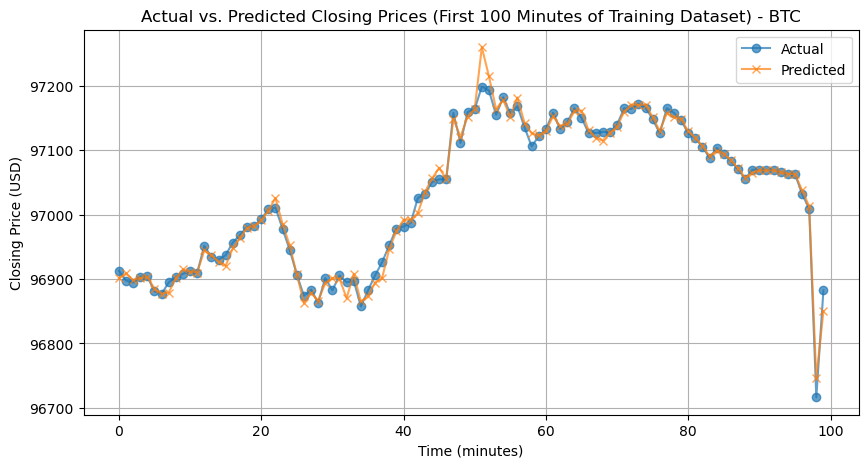

In [45]:
plot_comparison(y_test_btc, y_pred_btc, 'BTC')

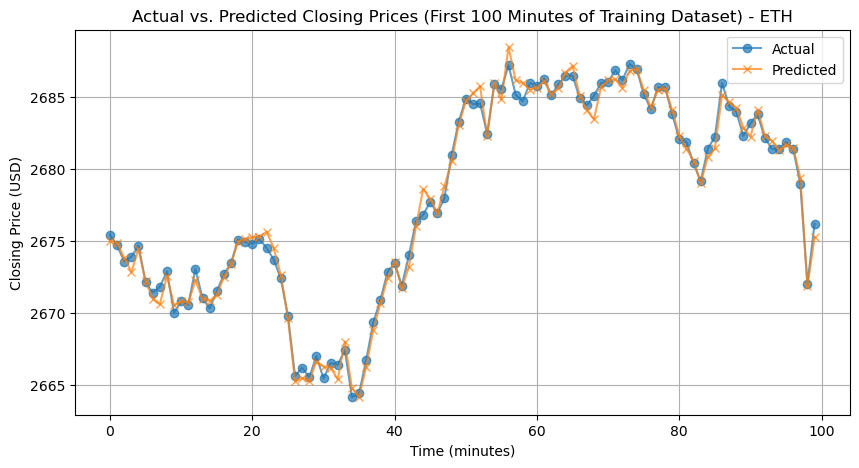

In [46]:
plot_comparison(y_test_eth, y_pred_eth, 'ETH')

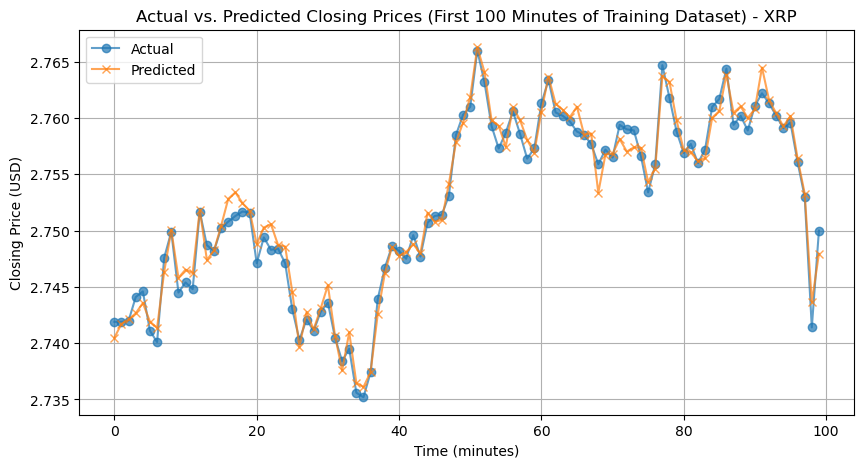

In [47]:
plot_comparison(y_test_xrp, y_pred_xrp, 'XRP')

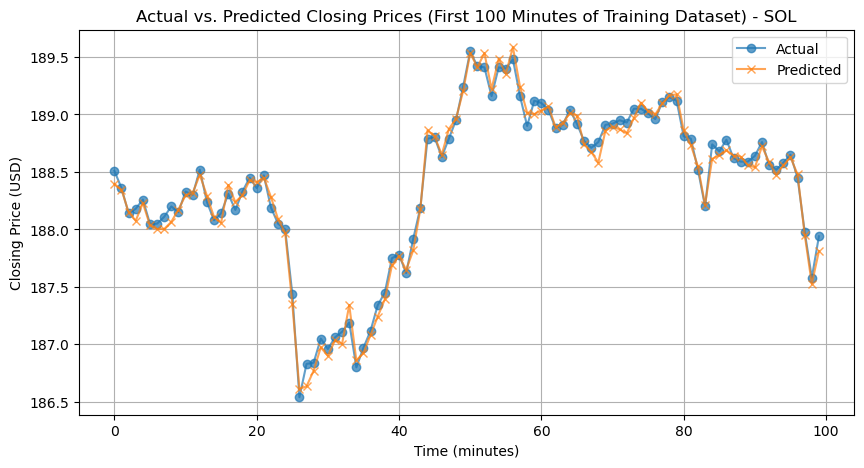

In [48]:
plot_comparison(y_test_sol, y_pred_sol, 'SOL')

#### 2. Training using only prices data (no indicators)

In [49]:
# Load the datasets
btc_indicators_2 = pd.read_csv("market_data/BTC_1m_data.csv")
eth_indicators_2 = pd.read_csv("market_data/ETH_1m_data.csv")
xrp_indicators_2 = pd.read_csv("market_data/XRP_1m_data.csv")
solana_indicators_2 = pd.read_csv("market_data/SOL_1m_data.csv")


In [50]:
X_btc_2, y_btc_2 = data_preprocessing(btc_indicators_2)
X_eth_2, y_eth_2 = data_preprocessing(eth_indicators_2)
X_xrp_2, y_xrp_2 = data_preprocessing(xrp_indicators_2)
X_sol_2, y_sol_2 = data_preprocessing(solana_indicators_2)

In [51]:
# X_train and X_test are scaled 
X_train_btc_2, X_test_btc_2, y_train_btc_2, y_test_btc_2 = train_test_split(X_btc_2, y_btc_2, test_size=0.2, random_state=42, shuffle=False)
X_train_eth_2, X_test_eth_2, y_train_eth_2, y_test_eth_2 = train_test_split(X_eth_2, y_eth_2, test_size=0.2, random_state=42, shuffle=False)
X_train_xrp_2, X_test_xrp_2, y_train_xrp_2, y_test_xrp_2 = train_test_split(X_xrp_2, y_xrp_2, test_size=0.2, random_state=42, shuffle=False)
X_train_sol_2, X_test_sol_2, y_train_sol_2, y_test_sol_2 = train_test_split(X_sol_2, y_sol_2, test_size=0.2, random_state=42, shuffle=False)

In [52]:
btc_model_2= train_model(X_train_btc_2, y_train_btc_2)
eth_model_2 = train_model(X_train_eth_2, y_train_eth_2)
xrp_model_2 = train_model(X_train_xrp_2, y_train_xrp_2)
solana_model_2 = train_model(X_train_sol_2, y_train_sol_2)

In [53]:
y_pred_btc_2 = evaluate_model(X_test_btc_2, y_test_btc_2, btc_model_2,'BTC')
y_pred_eth_2 = evaluate_model( X_test_eth_2, y_test_eth_2, eth_model_2, 'ETH')
y_pred_xrp_2 = evaluate_model(X_test_xrp_2, y_test_xrp_2, xrp_model_2, 'XRP')
y_pred_sol_2 = evaluate_model(X_test_sol_2, y_test_sol_2, solana_model_2, 'SOL')

MAE of BTC:17.66096158480202
RMSE of BTC:872.409153597407
MAE of ETH:0.8652793353449676
RMSE of ETH:1.7099138732997539
MAE of XRP:0.0010776632353312339
RMSE of XRP:2.498012767922334e-06
MAE of SOL:0.07173851274904777
RMSE of SOL:0.010503841633694793


In [54]:
next_minute_price(X_btc_2, y_btc_2, btc_model_2, 'BTC')
next_minute_price(X_eth_2, y_eth_2, eth_model_2, 'ETH')
next_minute_price(X_xrp_2, y_xrp_2, xrp_model_2, 'XRP')
next_minute_price(X_sol_2, y_sol_2, solana_model_2, 'SOL')

BTC: The price will increase from $83940.96 to $83956.69402620089
ETH: The price will decrease from $2222.31 to $2221.247130507977
XRP: The price will decrease from $2.145 to $2.1446650122902815
SOL: The price will increase from $145.44 to $145.51439363669917


/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/linyan/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


##### Comparing Actual Prices against Model Predictions

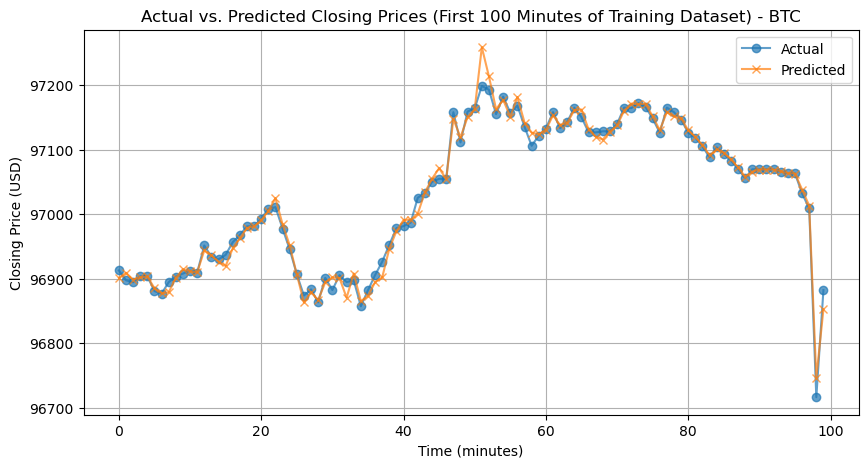

In [55]:
plot_comparison(y_test_btc_2, y_pred_btc_2, 'BTC')

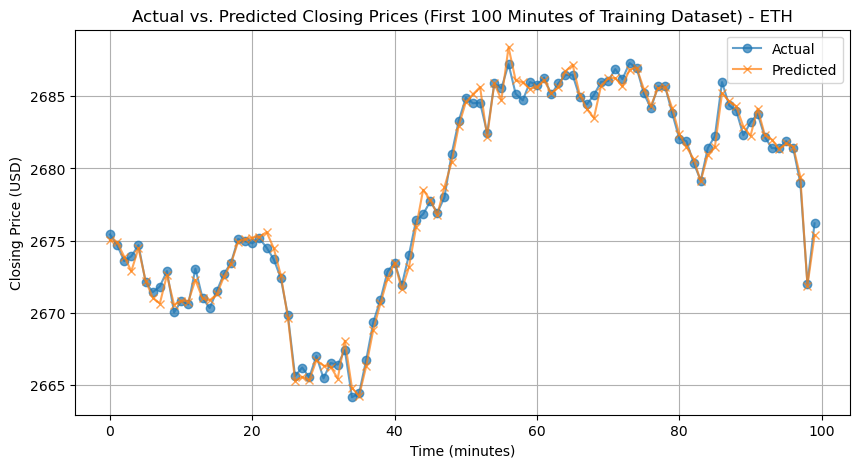

In [56]:
plot_comparison(y_test_eth_2, y_pred_eth_2, 'ETH')

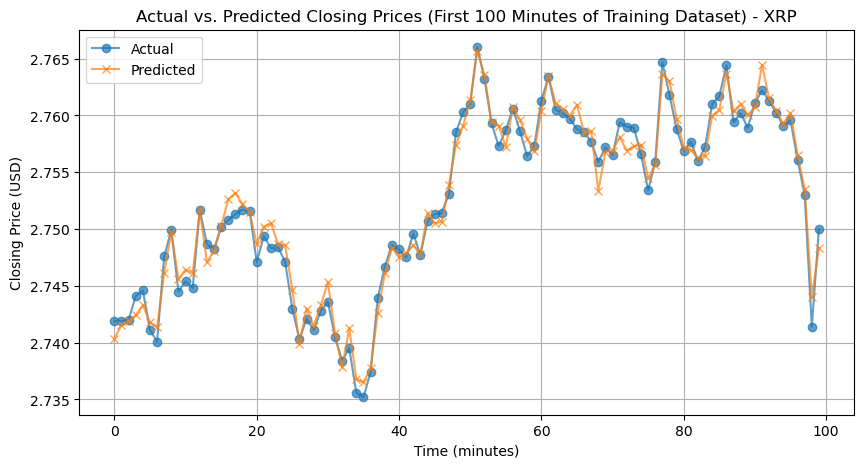

In [57]:
plot_comparison(y_test_xrp_2, y_pred_xrp_2, 'XRP')

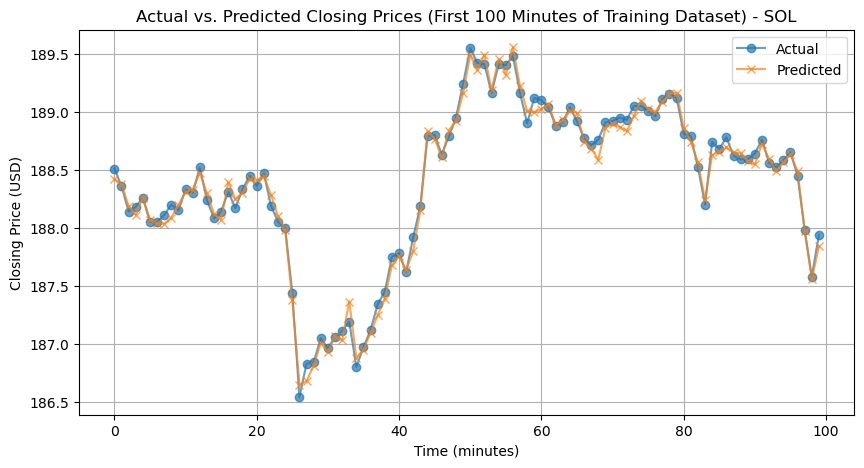

In [58]:
plot_comparison(y_test_sol_2, y_pred_sol_2, 'SOL')